# The Carpentries
## Programmatic assessment

This Jupyter notebook explores data related to the workshops we run and the instructors who teach.

In [1]:
## This code toggles all code cells displaying on or off, so we can see output and markdown cells only.
## All code cells display can be toggled on/off.

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline 

## Preview the data set for all workshops
Here is a preview of all workshops the Carpentries has ever run.  The `administrator_name` column contains inconsistent data - do not use.


In [15]:
workshops = pd.read_csv("workshops.csv")
workshops

,slug,tag_name,start,attendance,host_name,country
0,2012-01-18-stsci,SWC,2012-01-18,14.0,Space Telescope Science Institute,US
1,2012-02-20-itcp,SWC,2012-02-20,50.0,International Centre for Theoretical Physics,IT
2,2012-02-23-toronto,SWC,2012-02-23,28.0,University of Toronto,CA
3,2012-03-07-indiana,SWC,2012-03-07,39.0,Indiana University,US
4,2012-03-26-mbari,SWC,2012-03-26,38.0,Monterey Bay Aquarium Research Institute,US
5,2012-03-28-nersc,SWC,2012-03-28,35.0,NERSC,US
6,2012-04-02-chicago,SWC,2012-04-02,35.0,University of Chicago,US
7,2012-04-14-utahstate,SWC,2012-04-14,32.0,Utah State University,US
8,2012-04-30-ucl,SWC,2012-04-30,44.0,University College London,GB
9,2012-05-07-michiganstate,SWC,2012-05-07,55.0,Michigan State University,US


In [21]:
# Clean up the tag names

workshops.loc[workshops['tag_name'].str.contains("SWC"), "tag"] = "SWC"
workshops.loc[workshops['tag_name'].str.contains("DC"), "tag"] = "DC"
workshops.loc[workshops['tag_name'].str.contains("LC"), "tag"] = "LC"
workshops.loc[workshops['tag_name'].str.contains("TTT"), "tag"] = "TTT"


workshops['start'] = pd.to_datetime(workshops['start'])

workshops

,slug,tag_name,start,attendance,host_name,country,tag
0,2012-01-18-stsci,SWC,2012-01-18,14.0,Space Telescope Science Institute,US,SWC
1,2012-02-20-itcp,SWC,2012-02-20,50.0,International Centre for Theoretical Physics,IT,SWC
2,2012-02-23-toronto,SWC,2012-02-23,28.0,University of Toronto,CA,SWC
3,2012-03-07-indiana,SWC,2012-03-07,39.0,Indiana University,US,SWC
4,2012-03-26-mbari,SWC,2012-03-26,38.0,Monterey Bay Aquarium Research Institute,US,SWC
5,2012-03-28-nersc,SWC,2012-03-28,35.0,NERSC,US,SWC
6,2012-04-02-chicago,SWC,2012-04-02,35.0,University of Chicago,US,SWC
7,2012-04-14-utahstate,SWC,2012-04-14,32.0,Utah State University,US,SWC
8,2012-04-30-ucl,SWC,2012-04-30,44.0,University College London,GB,SWC
9,2012-05-07-michiganstate,SWC,2012-05-07,55.0,Michigan State University,US,SWC


## Part 1: Workshop data by country

### Workshops missing country data. 

In [17]:
# Workshops missing country data

workshops[pd.isnull(workshops['country'])]

,slug,tag_name,start,attendance,host_name,country,tag
809,2016-08-01-ttt-oklahoma,TTT,2016-08-01,NaN,University of Oklahoma,NaN,TTT
831,2016-08-22-unam,SWC,2016-08-22,23.0,University of Namibia,NaN,SWC
1206,2017-08-18-Windhoek,SWC,2017-08-18,15.0,University of Namibia,NaN,SWC
1412,2018-02-26-ttt-csiro,TTT,2018-02-26,1.0,Software Carpentry,NaN,TTT
1452,2018-03-22-csumb,SWC,2018-03-22,NaN,California State University Monterey Bay,NaN,SWC


### All countries we have ever held workshops in, with a lifetime count of workshops

In [18]:
# All countries we have ever done work in
countries = workshops['slug'].groupby([workshops['country']])
# countries is a SeriesGroupBy object
lifetime_countries = countries.count()
lifetime_countries = lifetime_countries.to_frame().reset_index()
lifetime_countries

,country,slug
0,AU,133
1,BE,2
2,BR,16
3,BW,1
4,CA,144
5,CH,15
6,CN,1
7,CO,1
8,CY,1
9,DE,25


### Filter the whole dataframe to include lifetime non-TTT workshops through 2018 Q1 only.

In [23]:
# Limit to non TTT workshops

workshops_nonTTT = workshops[workshops['tag'] != "TTT"]


# Limit df to workshops through 2018Q1 only

# # Get all workshops through 2017
# workshops_through_2017 = workshops_nonTTT[workshops_nonTTT['year'] <= 2017]

# # Get all workshops for 2018 Q1
# workshops_2018Q1 = workshops_nonTTT[(workshops_nonTTT['year'] == 2018) & (workshops_nonTTT['month'] <= 3)]

# # Combine the above two data frames
# workshops_through_2018Q1 = pd.concat([workshops_through_2017, workshops_2018Q1])
# workshops_through_2018Q1 # this will be the df used for the rest of the analysis.

# # This will be used later
# workshops_2017Q1 = workshops_nonTTT[(workshops_nonTTT['year'] == 2017) & (workshops_nonTTT['month'] <= 3)]


# workshops_through_2018Q1

### All workshops by year and country through 2018 Q1

Will need to use [pycountry](https://pypi.org/project/pycountry/) to translate two character codes into country names.

In [25]:
workshops_by_country_year = workshops_nonTTT.groupby(['country', workshops_nonTTT['start'].dt.year])['slug'].count().unstack()
workshops_by_country_year = workshops_by_country_year.fillna(0)
workshops_by_country_year.rename(columns={2018: '2018Q1'}, inplace=True)
workshops_by_country_year
workshops_by_country_year['total'] = workshops_by_country_year.sum(axis=1)
workshops_by_country_year

start,2012,2013,2014,2015,2016,2017,2018Q1,total
country,,,,,,,,
AU,0.0,6.0,10.0,32.0,41.0,33.0,6.0,128.0
BE,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0
BR,0.0,0.0,6.0,5.0,5.0,0.0,0.0,16.0
BW,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
CA,8.0,11.0,22.0,25.0,41.0,29.0,4.0,140.0
CH,0.0,0.0,2.0,4.0,5.0,2.0,1.0,14.0
CN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
CO,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
CY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### All workshops by country in 2017 (full year)

year,2017
country,
AU,9.0
CA,10.0
DE,2.0
GB,9.0
MX,1.0
NL,1.0
NO,1.0
NZ,3.0
TH,1.0


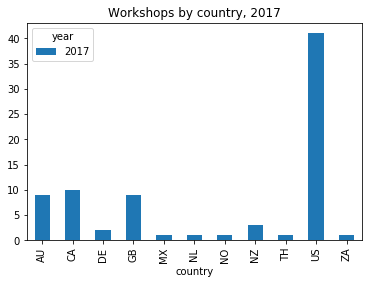

In [9]:
workshops_by_country_year_2017 = workshops_by_country_year[[2017]]
workshops_by_country_year_2017 = workshops_by_country_year_2017[(workshops_by_country_year_2017[2017] != 0)]
workshops_by_country_year_2017.plot.bar(title="Workshops by country, 2017")
workshops_by_country_year_2017

### All workshops by country 2018 Q1

year,2018Q1
country,
AU,6
CA,4
CH,1
DE,2
DK,1
ET,4
FR,1
GB,11
IE,1


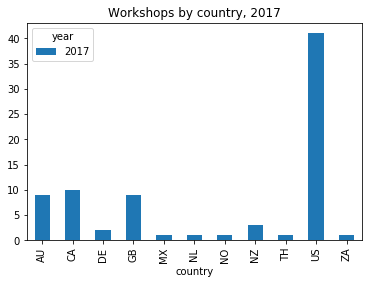

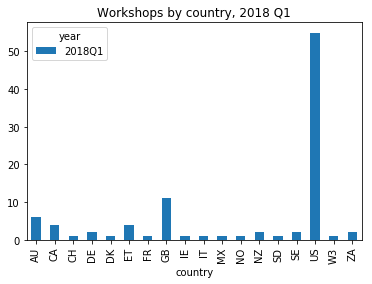

In [10]:
workshops_by_country_year_2018Q1 = workshops_2018Q1.groupby(['country', 'year'])['slug'].count().unstack()
workshops_by_country_year_2018Q1.rename(columns={2018:'2018Q1'}, inplace=True)
workshops_by_country_year_2017.plot.bar(title="Workshops by country, 2017")
workshops_by_country_year_2018Q1.plot.bar(title="Workshops by country, 2018 Q1")
workshops_by_country_year_2018Q1





### All workshops by country 2017 Q1

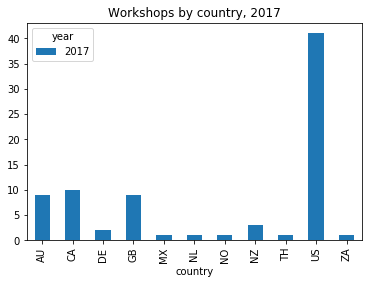

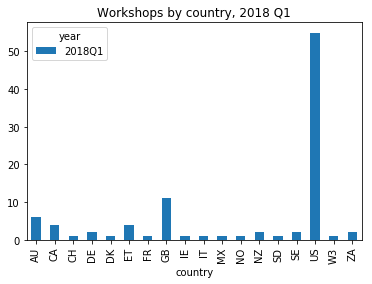

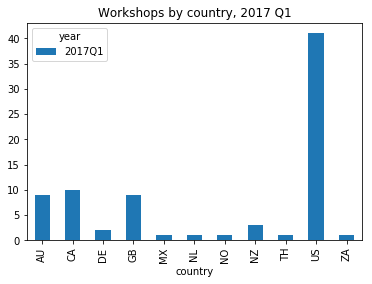

In [11]:

# 2017 Q1 workshops by country
workshops_by_country_year_2017Q1 = workshops_2017Q1.groupby(['country', 'year'])['slug'].count().unstack()
workshops_by_country_year_2017Q1.rename(columns={2017:'2017Q1'}, inplace=True)

# 2018 Q1 workshops by country
workshops_by_country_year_2018Q1 = workshops_2018Q1.groupby(['country', 'year'])['slug'].count().unstack()
workshops_by_country_year_2018Q1.rename(columns={2018:'2018Q1'}, inplace=True)

# Concatenated table, 2017 Q1 and 2018 Q1 workshops by country
workshops_by_country_year_1718Q1 = pd.concat([workshops_by_country_year_2017Q1, workshops_by_country_year_2018Q1], axis=1)

workshops_by_country_year_2017.plot.bar(title="Workshops by country, 2017")
workshops_by_country_year_2018Q1.plot.bar(title="Workshops by country, 2018 Q1")
workshops_by_country_year_2017Q1.plot.bar(title="Workshops by country, 2017 Q1")


### Side by side view of 2017 Q1 and 2018 Q1 workshops

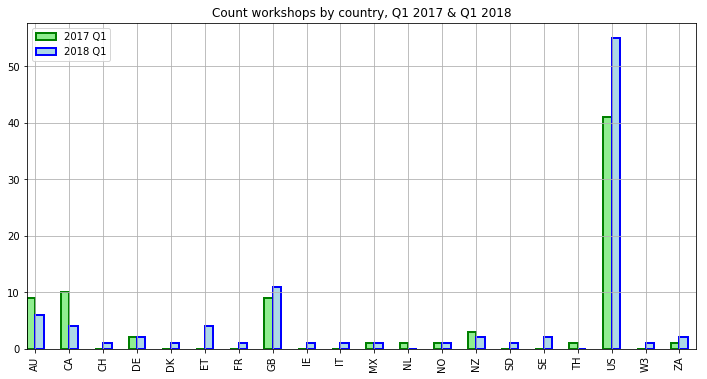

In [12]:
# plt.rcParams["patch.force_edgecolor"] = False

fig = plt.figure(figsize=(12, 6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
width = 0.25

workshops_by_country_year_1718Q1['2017Q1'].plot(kind='bar', color='lightgreen', ax=ax, width=width, position=1, edgecolor = 'green',  linewidth = 2)
workshops_by_country_year_1718Q1['2018Q1'].plot(kind='bar', color='lightblue', ax=ax, width=width, position=0, edgecolor = 'blue',  linewidth = 2)

ax.legend(["2017 Q1", "2018 Q1"]);

# ax.set_xticklabels(workshops_by_country_2018_Q1_all_countries.country)
ax.grid(True)

plt.title("Count workshops by country, Q1 2017 & Q1 2018")

plt.show()

In [ ]:
# Would like to include maps for the above data
# See http://geopandas.org/mapping.html

---
---
---

## Part 2: Workshop attendance data


## Analyzing attendance data


### Workshops missing attendance (through 2018 Q1)

These are sites that did not share attendance data with Carpentries staff.

In [ ]:
null_attendance = workshops_through_2018Q1[pd.isnull(workshops_through_2018Q1['attendance'])]
# Attendance == 0 means it was not recorded, not that no one attended
zero_attendance = workshops_through_2018Q1[(workshops_through_2018Q1['attendance'] == 0)]
missing_attendance = pd.concat([null_attendance, zero_attendance])
missing_attendance

### Workshops with attendance data through Q1 2018

In [ ]:
has_attendance_through_2018Q1 = workshops_through_2018Q1[np.isfinite(workshops_through_2018Q1['attendance'])]
has_attendance_through_2018Q1 = has_attendance_through_2018Q1[has_attendance_through_2018Q1['attendance'] > 0]
has_attendance_through_2018Q1

In [ ]:
print("FOR WORKSHOPS THROUGH Q1 2018:")
print("* COUNT ALL WORKSHOPS:", len(workshops_through_2018Q1))
print("* COUNT WORKSHOPS MISSING ATTENDANCE:", len(missing_attendance))
print("* COUNT WORKSHOPS WITH ATTENDANCE: ", len(has_attendance_through_2018Q1))
print("* APPROX ", int(round(len(missing_attendance)/len(workshops_through_2018Q1)*100)), "% OF WORKSHOPS ARE MISSING ATTENDANCE")

### Sum attendance by year

The charts below exclude workshops with missing attendance.

In [30]:
workshops_by_attendance = has_attendance_through_2018Q1.groupby(['tag', 'year'])['attendance'].sum().unstack()
workshops_by_attendance

NameError: name 'has_attendance_through_2018Q1' is not defined

In [ ]:
workshops_by_attendance.plot.bar(title="Total Carpentries learners by year")

### Binned attendance total through 2018 Q1

In [ ]:
bins = pd.cut(has_attendance_through_2018Q1['attendance'], [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, np.inf])
has_attendance_through_2018Q1.groupby(bins)['attendance'].agg(['count'])

### Binned attendance counts by year.

Shows how many workshops had 1-10 learners, 11-20 learners, etc. Right side is inclusive, left side is not.
How do we show this as a proportion of total, not just as absolute count?
How do we visualize this?  This will help us see if workshops are growing or shrinking in size.

In [ ]:
# See https://stackoverflow.com/questions/34317149/pandas-groupby-with-bin-counts
# >>> groups = df.groupby(['username', pd.cut(df.views, bins)])
# >>> groups.size().unstack()

bins = pd.cut(has_attendance_through_2018Q1['attendance'], [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, np.inf])
binned_attendance_by_year = has_attendance_through_2018Q1.groupby([ bins, 'year'])['attendance'].agg(['count'])

binned_attendance_by_year =  binned_attendance_by_year.unstack()
binned_attendance_by_year['total'] = binned_attendance_by_year.sum(axis=1)

binned_attendance_by_year

# How do we rename 2018 to 2018Q1?  It's not a single index value.

---
---
---

## Part 3: Workshops

## Workshops by year

This table and chart below show the total number of workshops each year through 2018 Q1. Instructor training events are not included here.

In [27]:
workshops_by_carpentry_year = workshops_through_2018Q1.groupby(['year', 'tag'])['slug'].count().unstack()

workshops_by_carpentry_year['total'] = workshops_by_carpentry_year.sum(axis=1)

workshops_by_carpentry_year.rename(index={'2018Q1':2018})

# df1.rename(index={1: 'a'})
workshops_by_carpentry_year

tag,DC,SWC,total
year,,,
2012,NaN,6.0,6.0
2013,NaN,20.0,20.0
2014,NaN,31.0,31.0
2015,6.0,50.0,56.0
2016,16.0,73.0,89.0
2017,13.0,66.0,79.0
2018,21.0,77.0,98.0


In [ ]:
fig = plt.figure(figsize=(12, 6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
width = .5
title = "Carpentries workshops count by year"

# df.plot(x="X", y=["A", "B", "C"], kind="bar")
workshops_by_carpentry_year.plot(y = ["DC", "LC", "SWC"], kind='bar', ax=ax, width=width, position=1, title=title)

ax.grid(True)

plt.show()

## Part 4: Badge data

This section is not working - need to add new query that counts badges & people, not just badges

### All badges

The table below shows all Instructor, Trainer, or Maintainer badges issued by the Carpentries. One individual may have multiple badges.

In [ ]:
all_badges = pd.read_csv("badges_by_year_agg.csv")
all_badges

### Badges by training event

The table below lists all instructor training events run by the Carpentries, with the number attended and the number getting badged, as well as this as a percentage.

In [ ]:
badges_by_training_event = pd.read_csv("badges_by_training_event.csv")

# Get all trainings through 2017
trainings_through_2017 = badges_by_training_event[badges_by_training_event['year'] <= 2017]

# Get all trainings for 2018 Q1
trainings_2018Q1 = badges_by_training_event[(badges_by_training_event['year'] == 2018) & (badges_by_training_event['month'] <= 3)]

# Combine the above two data frames
trainings_through_2018Q1 = pd.concat([trainings_through_2017, trainings_2018Q1])

trainings_through_2018Q1['pct_completion'] = trainings_through_2018Q1['count_badged'] / trainings_through_2018Q1['attendance'] * 100
trainings_through_2018Q1 = trainings_through_2018Q1.round({'pct_completion':1})
trainings_through_2018Q1


### Completion rates by training event

In [ ]:
bins = pd.cut(trainings_through_2018Q1['pct_completion'], [0, 25, 50, 75, 99, 100])
binned_badges_by_year = trainings_through_2018Q1.groupby([ bins, 'year'])['pct_completion'].agg(['count'])

binned_badges_by_year =  binned_badges_by_year.unstack()
binned_badges_by_year['total'] = binned_badges_by_year.sum(axis=1)

binned_badges_by_year

# Need to add total row

### Badges by country, 2017

This shows what country the badged person is in, not where the training took place.  The year is when the badge was awarded, not when the training took place.  Would like to plot years side by side to show growth in each country. An individual can have multiple badges.   

In [ ]:
# Source query here needs work. It is counting badged individuals, not badges issued.

badges_by_country_by_year_awarded = pd.read_csv("badges_by_country_by_year.csv")
badges_by_country_by_year_awarded = badges_by_country_by_year_awarded.groupby(['country', 'year_awarded'])['count(id)'].sum().unstack()
badges_by_country_by_year_awarded = badges_by_country_by_year_awarded.fillna(0)
badges_by_country_by_year_awarded.rename(columns={2018: '2018Q1'}, inplace=True)
badges_by_country_by_year_awarded
badges_by_country_by_year_awarded['total'] = badges_by_country_by_year_awarded.sum(axis=1)
badges_by_country_by_year_awarded

In [ ]:
badges2017 = badges_by_country_by_year_awarded[[2017]]
badges2017 = badges2017[badges2017[2017] != 0]
badges2017

### Instructor badges by country, 2018

This shows what country the badged person is in, not where the training took place.  The year is when the badge was awarded, not when the training took place.  Would like to plot years side by side to show growth in each country. 

In [ ]:
badges_by_country_by_year_awarded2018 = badges_by_country_by_year_awarded[badges_by_country_by_year_awarded['year_awarded'] == 2018]
badges_by_country_by_year_awarded2018.plot.bar(x='country', y='count(id)', title="Badges by country, 2018")
badges_by_country_by_year_awarded2018

In [ ]:
# Instructor training events
# Count number who got badged by event

# https://data.softwarecarpentry.org/queries/80/source#table
# https://data.softwarecarpentry.org/queries/83/source

# Online events - not country specific

# Would like to break this out by country as well
# Try https://data.softwarecarpentry.org/queries/61

In [29]:
'{1} {0}'.format(1, 2)

'2 1'